#Table of Contents
* [QSB Project](#QSB-Project)
	* [Import modules](#Import-modules)
	* [Load raw data](#Load-raw-data)
		* [Question 1](#Question-1)
	* [Define functions to fit](#Define-functions-to-fit)
	* [Fit data to functions](#Fit-data-to-functions)
		* [Model definition with PySB](#Model-definition-with-PySB)
	* [Simulate perturbations in the rates](#Simulate-perturbations-in-the-rates)


#QSB Project

##Import modules

In [1]:
%matplotlib inline

import csv
import matplotlib.pyplot as plt 
import numpy as np
from scipy.optimize import curve_fit
from pysb import *
from pysb.macros import *
import pylab as pl
from pysb.integrate import odesolve
import pandas as pd
from IPython.display import HTML

##Load raw data

In [2]:
raw_data = pd.DataFrame.from_csv('EC-RP_IMS-RP_IC-RP_data_for_models.csv')
raw_data.index.name = raw_data.index.name.replace('# ','')
time = raw_data.index.values
IC_RP = raw_data['norm_IC-RP']
IMS_RP = raw_data['IMS-RP step']
EC_RP = raw_data['norm_EC-RP']

In [3]:
time

array([  180,   360,   540,   720,   900,  1080,  1260,  1440,  1620,
        1800,  1980,  2160,  2340,  2520,  2700,  2880,  3060,  3240,
        3420,  3600,  3780,  3960,  4140,  4320,  4500,  4680,  4860,
        5040,  5220,  5400,  5580,  5760,  5940,  6120,  6300,  6480,
        6660,  6840,  7020,  7200,  7380,  7560,  7740,  7920,  8100,
        8280,  8460,  8640,  8820,  9000,  9180,  9360,  9540,  9720,
        9900, 10080, 10260, 10440, 10620, 10800, 10980, 11160, 11340,
       11520, 11700, 11880, 12060, 12240, 12420, 12600, 12780, 12960,
       13140, 13320, 13500, 13680, 13860, 14040, 14220, 14400, 14580,
       14760, 14940, 15120, 15300, 15480, 15660, 15840, 16020, 16200,
       16380, 16560, 16740, 16920, 17100, 17280, 17460, 17640, 17820,
       18000, 18180, 18360, 18540, 18720, 18900, 19080, 19260, 19440,
       19620, 19800, 19980, 20160])

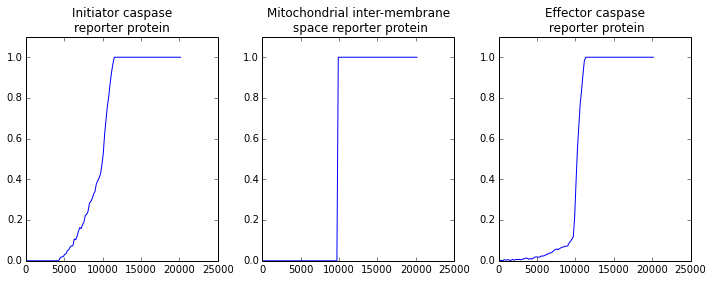

In [4]:
fig = plt.figure(figsize=(10,4))

ic_ax = fig.add_subplot(131)
ic_ax.plot(time,IC_RP)
ic_ax.set_ylim((0,1.1))
ic_ax.set_title("Initiator caspase \nreporter protein")

ims_ax = fig.add_subplot(132)
ims_ax.plot(time,IMS_RP)
ims_ax.set_ylim((0,1.1))
ims_ax.set_title("Mitochondrial inter-membrane\n space reporter protein")

ec_ax = fig.add_subplot(133)
ec_ax.plot(time,EC_RP)
ec_ax.set_ylim((0,1.1))
ec_ax.set_title("Effector caspase\n reporter protein")
fig.tight_layout()

###Question 1

Why is the shape of the normalized columns different from the raw counts?  
Looking at the raw data, the values are "stuck" in 1 after some time

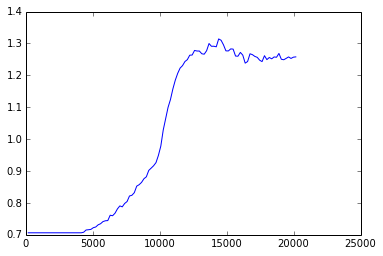

In [5]:
plt.plot(time,raw_data['IC-RP'])

##Define functions to fit

In [6]:
#We have to define the functions that we want to fit

def linea(x,a,b):
    return a*x+b


def expon(x,a,b,c):
    return a*np.exp(b*x)+c
    
    
def poli(x, a, b, c, d):
    return a*x**3 + b*x**2 +c*x + d

def hill(x,a,b):
    return 1 / (1 + np.power(a/x, b))

##Fit data to functions

In [7]:
to_be_fitted1 = IC_RP
to_be_fitted2 = IMS_RP
to_be_fitted3 =  EC_RP


In [8]:
poptl1, pcovl1 = curve_fit(linea,time,to_be_fitted1)
poptp1, pcovp1 = curve_fit(poli,time,to_be_fitted1)
poptex1, pcovex1 = curve_fit(expon,time,to_be_fitted1, p0=(0.1, 1e-4,10))
popth1, pcovexh1 = curve_fit(hill, time, to_be_fitted1)

poptl2, pcovl2 = curve_fit(linea,time,to_be_fitted2)
poptp2, pcovp2 = curve_fit(poli,time,to_be_fitted2)
poptex2, pcovex2 = curve_fit(expon,time,to_be_fitted2, p0=(0.1, 1e-4,10))
popth2, pcovexh2 = curve_fit(hill, time, to_be_fitted2)

poptl3, pcovl3 = curve_fit(linea,time,to_be_fitted3)
poptp3, pcovp3 = curve_fit(poli,time,to_be_fitted3)
poptex3, pcovex3 = curve_fit(expon,time,to_be_fitted3, p0=(0.1, 1e-4,10))
popth3, pcovexh3 = curve_fit(hill, time, to_be_fitted3)

linea_fit1 = linea(time,*poptl1)
poli_fit1 = poli(time,*poptp1)
expo_fit1 = expon(time,*poptex1)
hill_fit1 = hill(time, *popth1)

linea_fit2 = linea(time,*poptl2)
poli_fit2 = poli(time,*poptp2)
expo_fit2 = expon(time,*poptex2)
hill_fit2 = hill(time, *popth2)

linea_fit3 = linea(time,*poptl3)
poli_fit3 = poli(time,*poptp3)
expo_fit3 = expon(time,*poptex3)
hill_fit3 = hill(time, *popth3)

In [9]:
popth3

array([ 10224.47019404,     32.75991324])

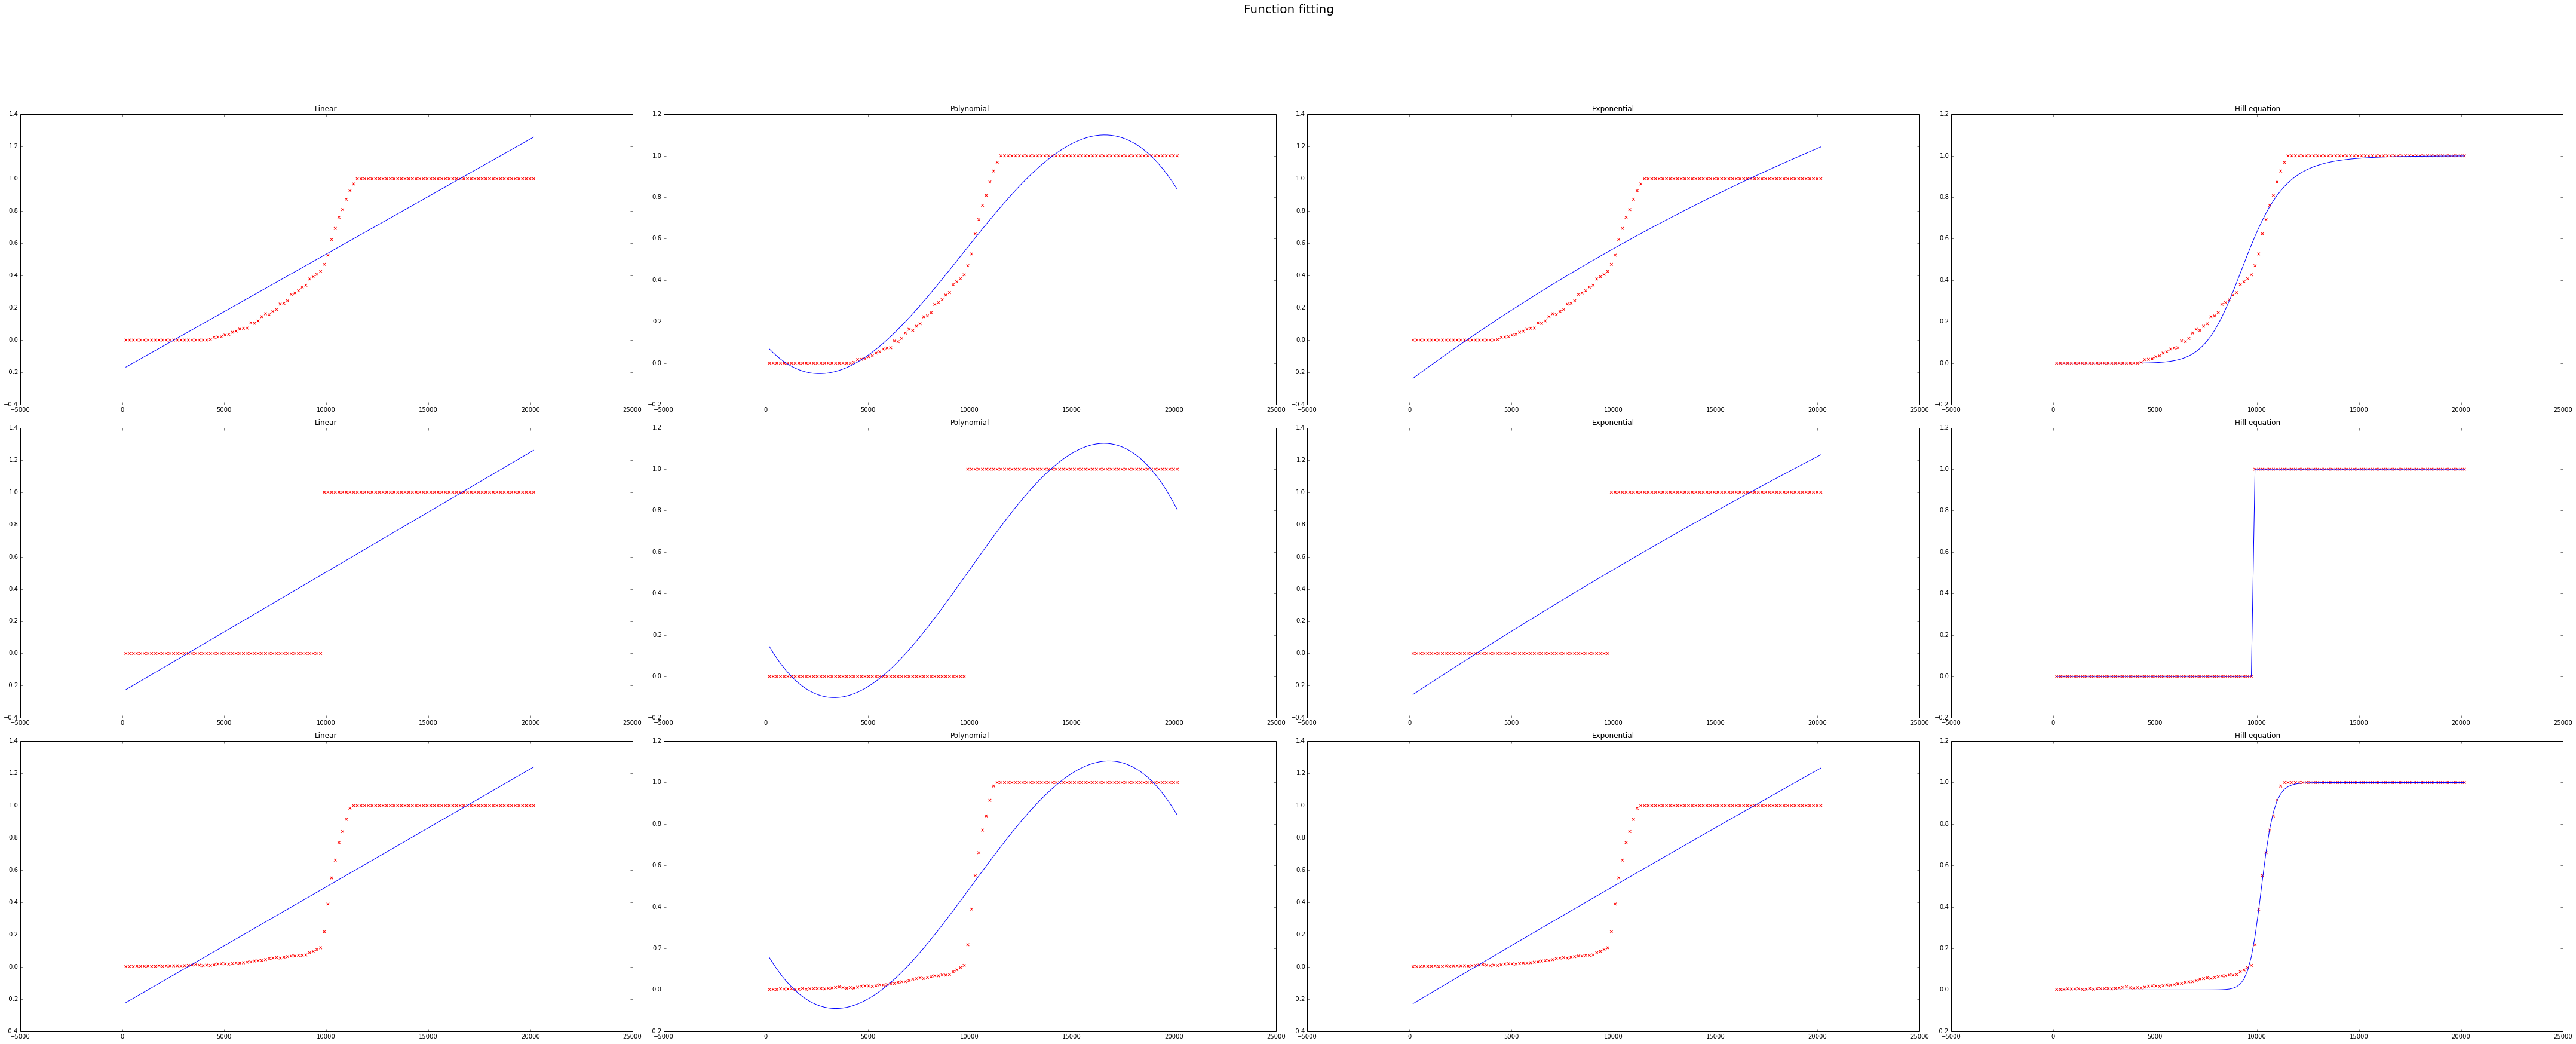

In [10]:
fig = plt.figure(figsize=(60,22))

line_ax = fig.add_subplot(341)
line_ax.plot(time,linea_fit1)
line_ax.scatter(time,to_be_fitted1,c='r',marker='x')
line_ax.set_title("Linear")

poly_ax = fig.add_subplot(342)
poly_ax.plot(time,poli_fit1)
poly_ax.scatter(time,to_be_fitted1,c='r',marker='x')
poly_ax.set_title("Polynomial")

exp_ax = fig.add_subplot(343)
exp_ax.plot(time,expo_fit1)
exp_ax.scatter(time,to_be_fitted1,c='r',marker='x')
exp_ax.set_title("Exponential")

hill_ax = fig.add_subplot(344)
hill_ax.plot(time,hill_fit1)
hill_ax.scatter(time,to_be_fitted1,c='r',marker='x')
hill_ax.set_title("Hill equation")

line_ax = fig.add_subplot(345)
line_ax.plot(time,linea_fit2)
line_ax.scatter(time,to_be_fitted2,c='r',marker='x')
line_ax.set_title("Linear")

poly_ax = fig.add_subplot(346)
poly_ax.plot(time,poli_fit2)
poly_ax.scatter(time,to_be_fitted2,c='r',marker='x')
poly_ax.set_title("Polynomial")

exp_ax = fig.add_subplot(347)
exp_ax.plot(time,expo_fit2)
exp_ax.scatter(time,to_be_fitted2,c='r',marker='x')
exp_ax.set_title("Exponential")

hill_ax = fig.add_subplot(348)
hill_ax.plot(time,hill_fit2)
hill_ax.scatter(time,to_be_fitted2,c='r',marker='x')
hill_ax.set_title("Hill equation")

line_ax = fig.add_subplot(349)
line_ax.plot(time,linea_fit3)
line_ax.scatter(time,to_be_fitted3,c='r',marker='x')
line_ax.set_title("Linear")

poly_ax = fig.add_subplot(3,4,10)
poly_ax.plot(time,poli_fit3)
poly_ax.scatter(time,to_be_fitted3,c='r',marker='x')
poly_ax.set_title("Polynomial")

exp_ax = fig.add_subplot(3,4,11)
exp_ax.plot(time,expo_fit3)
exp_ax.scatter(time,to_be_fitted3,c='r',marker='x')
exp_ax.set_title("Exponential")

hill_ax = fig.add_subplot(3,4,12)
hill_ax.plot(time,hill_fit3)
hill_ax.scatter(time,to_be_fitted3,c='r',marker='x')
hill_ax.set_title("Hill equation")

fig.suptitle("Function fitting\n\n",y=1.1,fontsize=20)

fig.tight_layout()

In [11]:
from sklearn import svm


In [12]:
#from sklearn import *

#clf=svm.SVR(kernel='linear', C=1e3, degree=2)
#clf.fit(time[:,None], EC_RP)
#x_new = np.linspace(0, 30000, 30000)
#y_new = clf.predict(x_new[:, None])
#ax = plt.axes()
#ax.scatter(time, EC_RP)
#ax.plot(x_new, y_new)

#ax.set_xlabel('x')
#ax.set_ylabel('y')

#ax.axis('tight')

#plt.show()




##Model definition with PySB

In [13]:
# %load qsb_model.py
"""
Created on Wed Apr 22 01:56:25 2015

@author: lolab
"""


import csv
import matplotlib.pyplot as plt 
import numpy as np
from scipy.optimize import curve_fit
from pysb import *
from pysb.macros import *
import pylab as pl
from pysb.integrate import odesolve

# some functions to make life easy
site_name = 'b'
def catalyze_b(enz, sub, product, klist):
    """Alias for pysb.macros.catalyze with default binding site 'b'.
    """
    return catalyze(enz, site_name, sub, site_name, product, klist)

def bind_table_b(table):
    """Alias for pysb.macros.bind_table with default binding sites 'bf'.
    """
    return bind_table(table, site_name, site_name)


KF = 1e-6
KR = 1e-3
KC = 1    

# Default forward, reverse, and catalytic rates
KFc = 8.6897973656754578e-07 #1e-6
KRc = 0.00026884384823502833 #1e-3
KCc = 7.9623024965305493 #1

KFcc = 8.6897973656754578e-07 #1e-6
KRcc = 0.00026884384823502833 #1e-3
KCcc = 7.9623024965305493 #1

KFb = 4.149733352245889e-09 #1e-7
KRb = 0.00050110975371602537 #1e-3
KCb = 0.39197357243506348 #1

KFba = 2.2299766742556005e-08 #1e-6
KRba = 0.0018670344174003893 #1e-3
KCba = 0.41085725049645588 #1

KFm = 1.2128334849034545e-07 #2e-6
KRm = 0.011242081848190973 #10e-3 
KCm = 17.003767066674314 #10

#C3 claeaves PARP
KFs = 4.0379463916345119e-05 #1e-6
KRs = 0.0024327371579203338 #10e-3 
KCs = 0.012083736473176411 #1





# Bcl2 Inhibition Rates
# OLD bcl2_bid_rates = [1e-6, 1e-3] # 1.0e-6/v_mito
bcl2_bid_rates = [2.3147601898026888e-06, 0.0017312607994352624] # 1.0e-6/v_mito
bcl2_bax_rates = [9.9990412921086819e-05, 2.0740711292172149e-05]
XIAP_C3_rates =  [9.9990412921086819e-05, 2.0740711292172149e-05]
XIAP_Smac_rates = [2.3147601898026888e-06, 0.0017312607994352624]

# instantiate a model
Model()

# declare monomers
Monomer('C8', ['b'])
Monomer('Bid',    ['b', 'S'], {'S':['n', 't']})
#Monomer('Bax', ['bf', 's1', 's2', 'state'], {'state':[ 'd', 'a']})
Monomer('Bax',   ['b', 'S'], {'S':['d', 'a']})
Monomer('M',   ['b', 'S'], {'S':['c', 'p']})
Monomer('Smac', ['b', 'S'], {'S':['m', 'r']})
Monomer('PARP', ['b', 'S'],  {'S':['n', 'c']})
Monomer('Bcl2', ['b'])
Monomer('C3', ['b', 'S'], {'S':['d','a']})
Monomer('XIAP', ['b'])

synthesize(C8(b=None), 0.032866241994187327)
catalyze_b(C8, C3(S='d'), C3(S='a'), [KFcc, KRcc, KCcc])
catalyze_b(C3(S='a'), PARP(S='n'), PARP(S='c'), [KFs, KRs, KCs])
catalyze_b(C8, Bid(S='n'), Bid(S='t'), [KFc, KRc, KCc])
# Activate Bax
catalyze_b(Bid(S='t'), Bax(S='d'), Bax(S='a'), [KFb, KRb, KCb])


# Activate Bax/Bak
catalyze_b(Bax(S='a'), M(S='c'), M(S='p'), [KFba, KRba, KCba])
catalyze_b(M(S='p'), Smac(S='m'), Smac(S='r'), [KFm, KRm, KCm])
#catalyze_b(Smac(S='r'), PARP(S='n'), PARP(S='c'), [KFs, KRs, KCs])

bind_table_b([[                  Bcl2,           XIAP],
              [Bid(S='t'),   bcl2_bid_rates,     None        ],
              [Bax(S='a'),   bcl2_bax_rates,     None        ],
              [C3,           None,          XIAP_C3_rates    ],
              [Smac(S='r'), None ,         XIAP_Smac_rates  ]])

# Bid, Bax, BclxL "transport" to the membrane
#equilibrate(Bid(b=None, S='t'),   Bid(b=None, S='m'), [1e-1, 1e-3])
#equilibrate(Bax(b=None, S='m'),   Bax(b=None, S='a'), [1e-1, 1e-3])
#equilibrate(BclxL(b=None, S='c'), BclxL(b=None, S='m'), [1e-1, 1e-3])


# initial conditions
Parameter('C8_0',    0)
Parameter('Bid_0',   4e4)
Parameter('Bax_0',  1e5)
Parameter('M_0',  5e5)
Parameter('Smac_0', 1e5)
Parameter('PARP_0',  1e6)
Parameter('Bcl2_0',  2e4)
Parameter('C3_0',  2e4)
Parameter('XIAP_0',  2e4)

Initial(C8(b=None), C8_0)
Initial(Bid(b=None, S='n'), Bid_0)
Initial(Bax(b=None, S='d'), Bax_0)
Initial(M(b=None, S='c'), M_0)
Initial(Smac(b=None, S='m'), Smac_0)
Initial(PARP(b=None, S='n'), PARP_0)
Initial(Bcl2(b=None), Bcl2_0)
Initial(C3(b=None, S='d'), C3_0)
Initial(XIAP(b=None), XIAP_0)

# Observables
Observable('mBid', Bid(b=None, S='t'))
Observable('aSmac', Smac(b=None, S='r'))
Observable('cPARP', PARP(b=None, S='c'))



Observable('cPARP', PARP(b=None, S='c'))

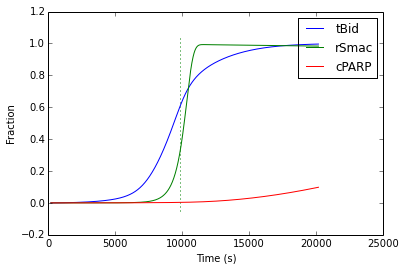

In [14]:


# Build time points for the integrator, using the same time scale as the 
# experimental data
ntimes = len(time)
#Factor by which to increase time resolution
tmul = 10
# Do the sampling such that the original experimental timepoints can be
# extracted with a slice expression instead of requiring interpolation.
tspan = np.linspace(time[0], time[-1],
                    (ntimes-1) * tmul + 1)
# Initialize solver object
yout = odesolve(model, tspan, rtol=1e-5, atol=1e-5)

momp_obs_total = model.parameters['Smac_0'].value
momp_data = np.array([9810.0, 180.0, momp_obs_total])

pl.ion()
pl.figure()
plt.plot(tspan, yout['mBid']/model.parameters['Bid_0'].value, label="tBid")
plt.plot(tspan, yout['aSmac']/model.parameters['Smac_0'].value, label='rSmac')
plt.plot(tspan, yout['cPARP']/model.parameters['PARP_0'].value, label='cPARP')
plt.vlines(momp_data[0], -0.05, 1.05, color='g', linestyle=':')
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Fraction")
plt.show()


##Simulate perturbations in the rates

The idea in this section is to systematically modify the the rates of the different reactions, and see which perturbations causes more damage.  
Here, I think by "damage" I mean: distance from the empirically determined model. It will assume that the empirically determined model is optimal, though. We can think of another standard.  
  
  
I propose two alternatives
* Randomly disturb the rates
* Systematically increase the rates from 0 to X (and all combinations of rates)

In [15]:
def mess_it_up(number):
    '''
    Take a number (rate), and add/substract a
    random number from it
    Given that it could take negative values,
    maybe scaling it could be a better idea,
    because truncating the substraction if <0
    is kind of dirty and not "as random" as
    it should be. Another option is to use a 
    positively bounded distribution
    '''
    sign = np.random.choice([-1,1])
    # It would be better to use a more elegant
    # distribution
    to_be_added = np.random.rand()
    print(sign*to_be_added)

In [16]:
mess_it_up(2)

-0.619799694139


In [17]:
def pick_rate(things):
    '''
    given a set of "things" (dict, list)
    return a subset of them that will be messed up
    '''
    chosen =[]
    for thing in things:
        if np.random.choice([0,1]):
            chosen.append(thing)
    return chosen

In [18]:
pick_rate([1,2,3,4,5])

[1, 2, 3, 4]

##Models comparison
If we can transform the output to be compared in the model (one specific product, trajectories, etc) to a probability distribution (by calculating proportions, relative frequences, etc), I think that the Jensen-Shannon distance is a good idea. It is based in information theory, it is quite robust, it doesn't need those nasty p-values, and it handles different parameters space quite well

In [19]:
HTML('<iframe src="http://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence" style="border:none" width="800" height="400"></iframe>')

###JSD implementation

In [20]:
def DLK(u,v,epsilon,bg):
    '''
    Calculate Kullback-Leibler divergence
    u,v: numpy arrays
    e: epsilon -> pseudocounts to add
    bg: background weight. Under a uniform distribution, bg is 1/(4^k)
    '''
    ps_count = epsilon * bg
    # Get proportions and add pseudocount
    u_prop = (u + ps_count) / sum(u)
    v_prop = (v + ps_count) / sum(v)
#     dlk = sum(u_prop * np.log(u_prop/v_prop))
    dlk = sum(u_prop * np.log2(u_prop/v_prop))
    return dlk

def JSD(u,v,epsilon,bg):
    '''
    Calculate the Jensen-Shannon distance
    u,v: numpy arrays
    e and bg are arguments for DLK
    e: epsilon -> pseudocounts to add
    bg: background weight. Under a uniform distribution, bg is 1/(4^k)
    '''
    m = (u + v) / 2
    # Calculate Jensen-Shannon divergence
    js_div = (DLK(u,m,epsilon,bg) + DLK(v,m,epsilon,bg)) / 2
    #Calculate Jensen-Shannon distance
    jsdist = np.sqrt(js_div)
    return jsdist